In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
# %matplotlib inline --> Displays plots directly inside the notebook (instead of opening a new window).

In [2]:
from sklearn.datasets import make_classification
# Generate a synthetic dataset for classification problems.

In [37]:
## Create dataset
X, y = make_classification(n_samples=1000,n_features=10, n_classes=2, random_state=42)
# X --> independent feature,   y --> dependent feature

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=42)

In [39]:
# Model training
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()


In [40]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predicting
y_pred = logistic.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0]


In [3]:
## Performence Matrix

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
# Accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy : ", score)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix : \n", cm)

# Classification report
cfr = classification_report(y_test,y_pred)
print("\n Classification Report :\n",cfr)


Accuracy :  0.8466666666666667

Confusion Matrix : 
 [[118  17]
 [ 29 136]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       135
           1       0.89      0.82      0.86       165

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



### Parameters in Logistic regression

| **Parameter**    | **Description** | **Common Choices** | **When to Use / Effect** |
|-----------------|----------------|--------------------|-------------------------|
| **penalty**     | Type of regularization to prevent overfitting by penalizing large coefficients. | `l2` (default), `l1` (feature selection), `none`, `elasticnet` (mix of L1 & L2, needs `l1_ratio`). | Use `l1` for sparse models, `l2` for smooth weight decay, `elasticnet` for a mix. |
| **C**          | Inverse of regularization strength (1/λ). Higher `C` = less regularization, lower `C` = more regularization. | `1.0` (default), `0.1` (strong regularization), `10` (weak regularization). | Lower `C` if overfitting, higher `C` if underfitting. |
| **solver**      | Optimization algorithm. Some solvers support specific penalties. | `lbfgs` (default), `liblinear` (L1 & small data), `saga` (L1, L2, large data), `sag` (fast for large data). | Use `liblinear` for small datasets, `saga` for large, `lbfgs` for general cases. |
| **max_iter**    | Max iterations for solver convergence. | `100` (default), `200`, `500`. | Increase if model shows "ConvergenceWarning." |
| **class_weight** | Adjusts weights for imbalanced datasets. | `None` (default), `'balanced'` (auto-adjusts by class frequency). | Use `'balanced'` for handling class imbalance (e.g., 90% vs 10% split). |
| **random_state** | Controls randomness for reproducibility. | `None` (default), `42` (or any fixed integer). | Use a fixed value for consistent results when retraining. |


## Hyperparameter Tuning And Cross Validation

In [44]:
model = LogisticRegression()

# Define parameter grid
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [45]:
params = dict(penalty=penalty, C=c_values, solver=solver)

- `StratifiedKFold` is a cross-validation technique that **ensures each fold maintains the same class distribution as the original dataset.**
- It is an improved version of `KFold`, which randomly splits data but **doesn’t preserve class balance.**

In [46]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()

#### GridSearchCV
- **Grid Search CV** is a hyperparameter tuning technique that **systematically searches for the best combination of hyperparameters** by evaluating multiple options using **cross-validation (CV)**. 

- It helps find the optimal parameters that improve model performance.

In [47]:
## Grid search cv
from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)


In [30]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [48]:
grid.fit(X_train,y_train) # training the GridSearchCV mode

C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dines\AppData\Roaming\Python\Python312\site

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
grid.best_params_ # Returns the best combination of hyperparameters who are selected.

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [51]:
print(grid.best_score_) # Best cross-validation (Accuracy) score.


0.8785714285714287


In [53]:
y_pred = grid.predict(X_test)

In [ ]:
# Accuracy --> increased compare to previous
score = accuracy_score(y_test, y_pred)
print("Accuracy : ", score)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix : \n", cm)

# Classification report
cfr = classification_report(y_test,y_pred)
print("\n Classification Report :\n",cfr)

Accuracy :  0.8533333333333334

Confusion Matrix : 
 [[124  11]
 [ 33 132]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Randomized SearchCV
- **Alternative to GridSearchCV** that searches for the best hyperparameters by **randomly selecting a subset of combinations** instead of trying all possible ones.

- `GridSearchCV` → Exhaustively tests all combinations (slower for large search spaces).

- `RandomizedSearchCV` → Tests a random subset of combinations (faster but may not find the absolute best).

In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
model = LogisticRegression()
randomCv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy',n_jobs=-1)

In [60]:
randomCv.fit(X_train,y_train)

C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dines\AppData\Roaming\Python\Python312\site-pa

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [ ]:
randomCv.best_params_ # # Returns parameters who are selected.

{'solver': 'saga', 'penalty': 'l2', 'C': 0.01}

In [63]:
print(randomCv.best_score_)

0.8785714285714287


In [65]:
y_pred = randomCv.predict(X_test)

In [68]:
# Accuracy --> is same GreadSearchCV result
score = accuracy_score(y_test, y_pred)
print("Accuracy : ", score)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix : \n", cm)

# Classification report
cfr = classification_report(y_test,y_pred)
print("\n Classification Report :\n",cfr)

Accuracy :  0.8533333333333334

Confusion Matrix : 
 [[124  11]
 [ 33 132]]

 Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       135
           1       0.92      0.80      0.86       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.86      0.85      0.85       300



### Logistic Regression For Multiclass Classification Problem

In [4]:
## Create dataset
x,y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=20)

In [5]:
y

array([1, 2, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 2, 1,
       0, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0,
       2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2,
       2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0,
       0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1,
       2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 0, 1,
       0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 2,
       0, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2,

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(multi_class='ovr') 
# multi_class='ovr' → Specifies the One-vs-Rest (OvR) strategy for multi-class classification.

logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)

C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [8]:
y_pred

array([1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 2,
       1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 0, 2, 0, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 2, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0,
       2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 1,
       2, 1, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 1])

In [9]:
score=accuracy_score(y_pred,y_test)
print("Accuracy : ",score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

Accuracy :  0.7566666666666667
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        90
           1       0.80      0.72      0.76       105
           2       0.77      0.75      0.76       105

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300

[[72  9  9]
 [15 76 14]
 [16 10 79]]


### Logistic Regression for Imbalanced Dataset
- An `imbalanced dataset` is a dataset where the number of observations in one class is **significantly higher** than in another.

In [10]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [11]:
## imbalanced dataset
X, y = make_classification(
    n_samples=10000, 
    n_features=2, 
    n_clusters_per_class=1, # Each class is grouped into a single cluster
    n_redundant=0, # No redundant features; both features are useful.
    weights=[0.99], # 99% of the samples belong to class 0, and only 1% belong to class 1 (imbalanced data).
    random_state=10
)

# Cluster :-
#        A cluster is a group of similar data points that are close together in feature space.


In [12]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]], shape=(10000, 2))

In [13]:
Counter(y) # count the occurrences of each class label in y

Counter({np.int64(0): 9846, np.int64(1): 154})

In [14]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

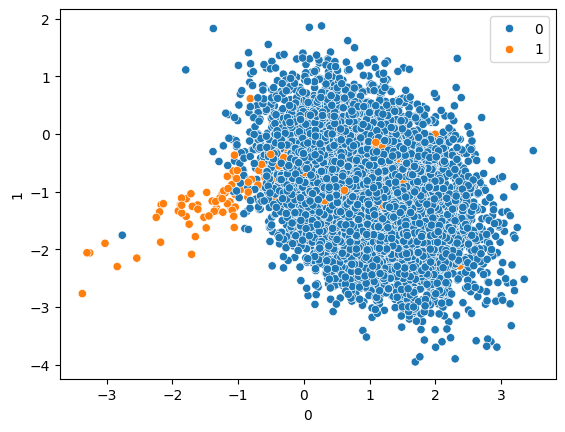

In [15]:
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
## hue=y ---> Parameter used to color the points in the scatter plot based on a categorical or numerical variable

In [16]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

- The `class_weight` parameter is used in models like `LogisticRegression` to handle **imbalanced datasets** by assigning different importance (weights) to each class.

In [17]:
# Try different class weights
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [18]:
class_weight
# {0:1, 1:1} --> Give 0 to 1 importance, 1 to 1 importance(Both has equal importance).
# {0:50, 1:100} --> Give 0 to 50 importance, 1 to 100 importance

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [19]:
## Hyperparamter tuning
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [20]:
params=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

# This creates a dictionary of hyperparameters (params) for a logistic regression model.

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold()
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv)

In [22]:
grid.fit(X_train,y_train)

C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dines\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dines\

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

#### Warnings:-
- This warning appears when **Logistic Regression** does not converge within the allowed number of iterations (`max_iter`).

In [24]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [25]:
y_pred = grid.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.992
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2486
           1       0.40      0.86      0.55        14

    accuracy                           0.99      2500
   macro avg       0.70      0.92      0.77      2500
weighted avg       1.00      0.99      0.99      2500

[[2468   18]
 [   2   12]]


### Logistic Regression With ROC curve And ROC AUC score

- **`ROC(Receiver Operating Characteristic) Curve`**
    
    The ROC curve is a graph showing the **true positive rate (TPR)** vs. **false positive rate (FPR)** at different classification thresholds.
    
    ![image](image.png)
    ![image-2](image-2.png)

- **`ROC AUC(Area Under the Curve) Score`**

    AUC is a single number summary of the ROC curve, ranges between 0 to 1.

    **1.0** → Perfect classifier

    **0.5** → Random guessing
    
    **< 0.5** → Worse than random


   



In [27]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [28]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [29]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [30]:
# Created a dummy model with default 0 as output 
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [31]:
## Lets Create Basic Logistic Model
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
## Prediction based on probability
model_prob=model.predict_proba(X_test)
model_prob

array([[8.17237415e-02, 9.18276259e-01],
       [1.13344259e-01, 8.86655741e-01],
       [9.76832552e-01, 2.31674481e-02],
       [1.81093915e-02, 9.81890609e-01],
       [4.54686794e-02, 9.54531321e-01],
       [2.03249282e-01, 7.96750718e-01],
       [9.93162656e-01, 6.83734407e-03],
       [9.45976087e-01, 5.40239126e-02],
       [8.69028777e-03, 9.91309712e-01],
       [5.91398651e-01, 4.08601349e-01],
       [9.85074068e-01, 1.49259319e-02],
       [8.29281652e-02, 9.17071835e-01],
       [1.37466495e-01, 8.62533505e-01],
       [5.20697767e-03, 9.94793022e-01],
       [9.60063575e-01, 3.99364247e-02],
       [9.50688533e-01, 4.93114672e-02],
       [2.10393564e-02, 9.78960644e-01],
       [8.30240259e-01, 1.69759741e-01],
       [9.62818718e-01, 3.71812822e-02],
       [3.21780632e-02, 9.67821937e-01],
       [9.96085581e-01, 3.91441895e-03],
       [1.14045645e-01, 8.85954355e-01],
       [1.80352806e-01, 8.19647194e-01],
       [4.30414556e-01, 5.69585444e-01],
       [4.115915

In [33]:
## Lets focus on the positive outcome
model_prob=model_prob[:,1]

In [34]:
## calculate ROC Curves
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)

model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [35]:
thresholds

# Each threshold value in roc_curve(y_test, model_prob) 
# represents a different decision boundary for classifying instances as positive or negative.

# As the threshold changes, the True Positive Rate (TPR) and False Positive Rate (FPR) also change, 
# resulting in different points on the ROC curve.



array([           inf, 9.99408591e-01, 9.48789051e-01, 9.45875797e-01,
       9.35535228e-01, 9.34011458e-01, 9.28076959e-01, 9.26098222e-01,
       9.09462284e-01, 9.01743080e-01, 8.97971882e-01, 8.87913921e-01,
       8.55039135e-01, 8.50088338e-01, 8.45804170e-01, 8.32576905e-01,
       8.19647194e-01, 8.15943076e-01, 8.07941846e-01, 8.01595231e-01,
       7.72502908e-01, 7.72061776e-01, 7.18381195e-01, 7.16495666e-01,
       6.62185322e-01, 6.29275041e-01, 6.17835757e-01, 6.10039921e-01,
       5.96301960e-01, 5.88408407e-01, 5.69585444e-01, 5.42664587e-01,
       5.29164218e-01, 5.13611459e-01, 5.10245990e-01, 4.87974294e-01,
       4.84907445e-01, 4.56156711e-01, 4.47168571e-01, 4.26498394e-01,
       3.64869889e-01, 3.56886293e-01, 3.46033141e-01, 3.08051495e-01,
       3.01298121e-01, 2.85600699e-01, 2.85090339e-01, 2.18727039e-01,
       1.97022170e-01, 1.34038345e-01, 1.33315877e-01, 1.30519699e-01,
       1.27153287e-01, 1.04921781e-01, 1.04292580e-01, 7.04849255e-02,
      

- wherever there is a **high true positive rate** and **less false positive rate** will capture that particular point.
- And that threshold will be **selected for our logistic regression.**

In [36]:
model_fpr, model_tpr

(array([0.   , 0.   , 0.   , 0.008, 0.008, 0.016, 0.016, 0.024, 0.024,
        0.032, 0.032, 0.048, 0.048, 0.056, 0.056, 0.072, 0.072, 0.08 ,
        0.08 , 0.088, 0.088, 0.096, 0.096, 0.104, 0.104, 0.112, 0.112,
        0.128, 0.128, 0.136, 0.136, 0.144, 0.144, 0.16 , 0.16 , 0.184,
        0.184, 0.2  , 0.2  , 0.208, 0.208, 0.224, 0.224, 0.24 , 0.24 ,
        0.256, 0.256, 0.296, 0.296, 0.392, 0.392, 0.4  , 0.4  , 0.448,
        0.448, 0.528, 0.528, 0.56 , 0.56 , 0.624, 0.624, 0.952, 0.952,
        1.   ]),
 array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
        0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
        0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
        0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
        0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
        0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
        0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.9

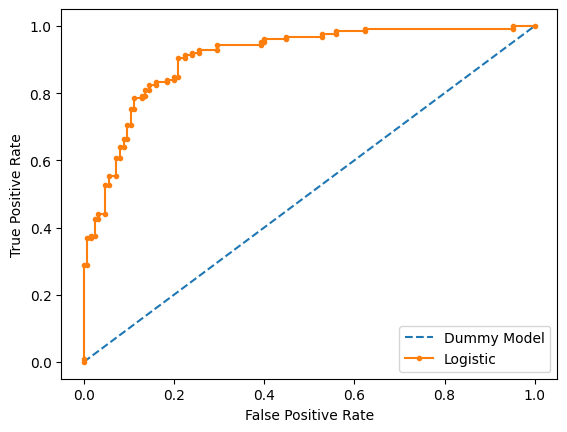

In [37]:
# plot the roc curve for the model
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

- In above figure:-  **AUC(Logistic)** `>` **AUC(Dummy)**

    So, logistic model performed well compared to dummy.

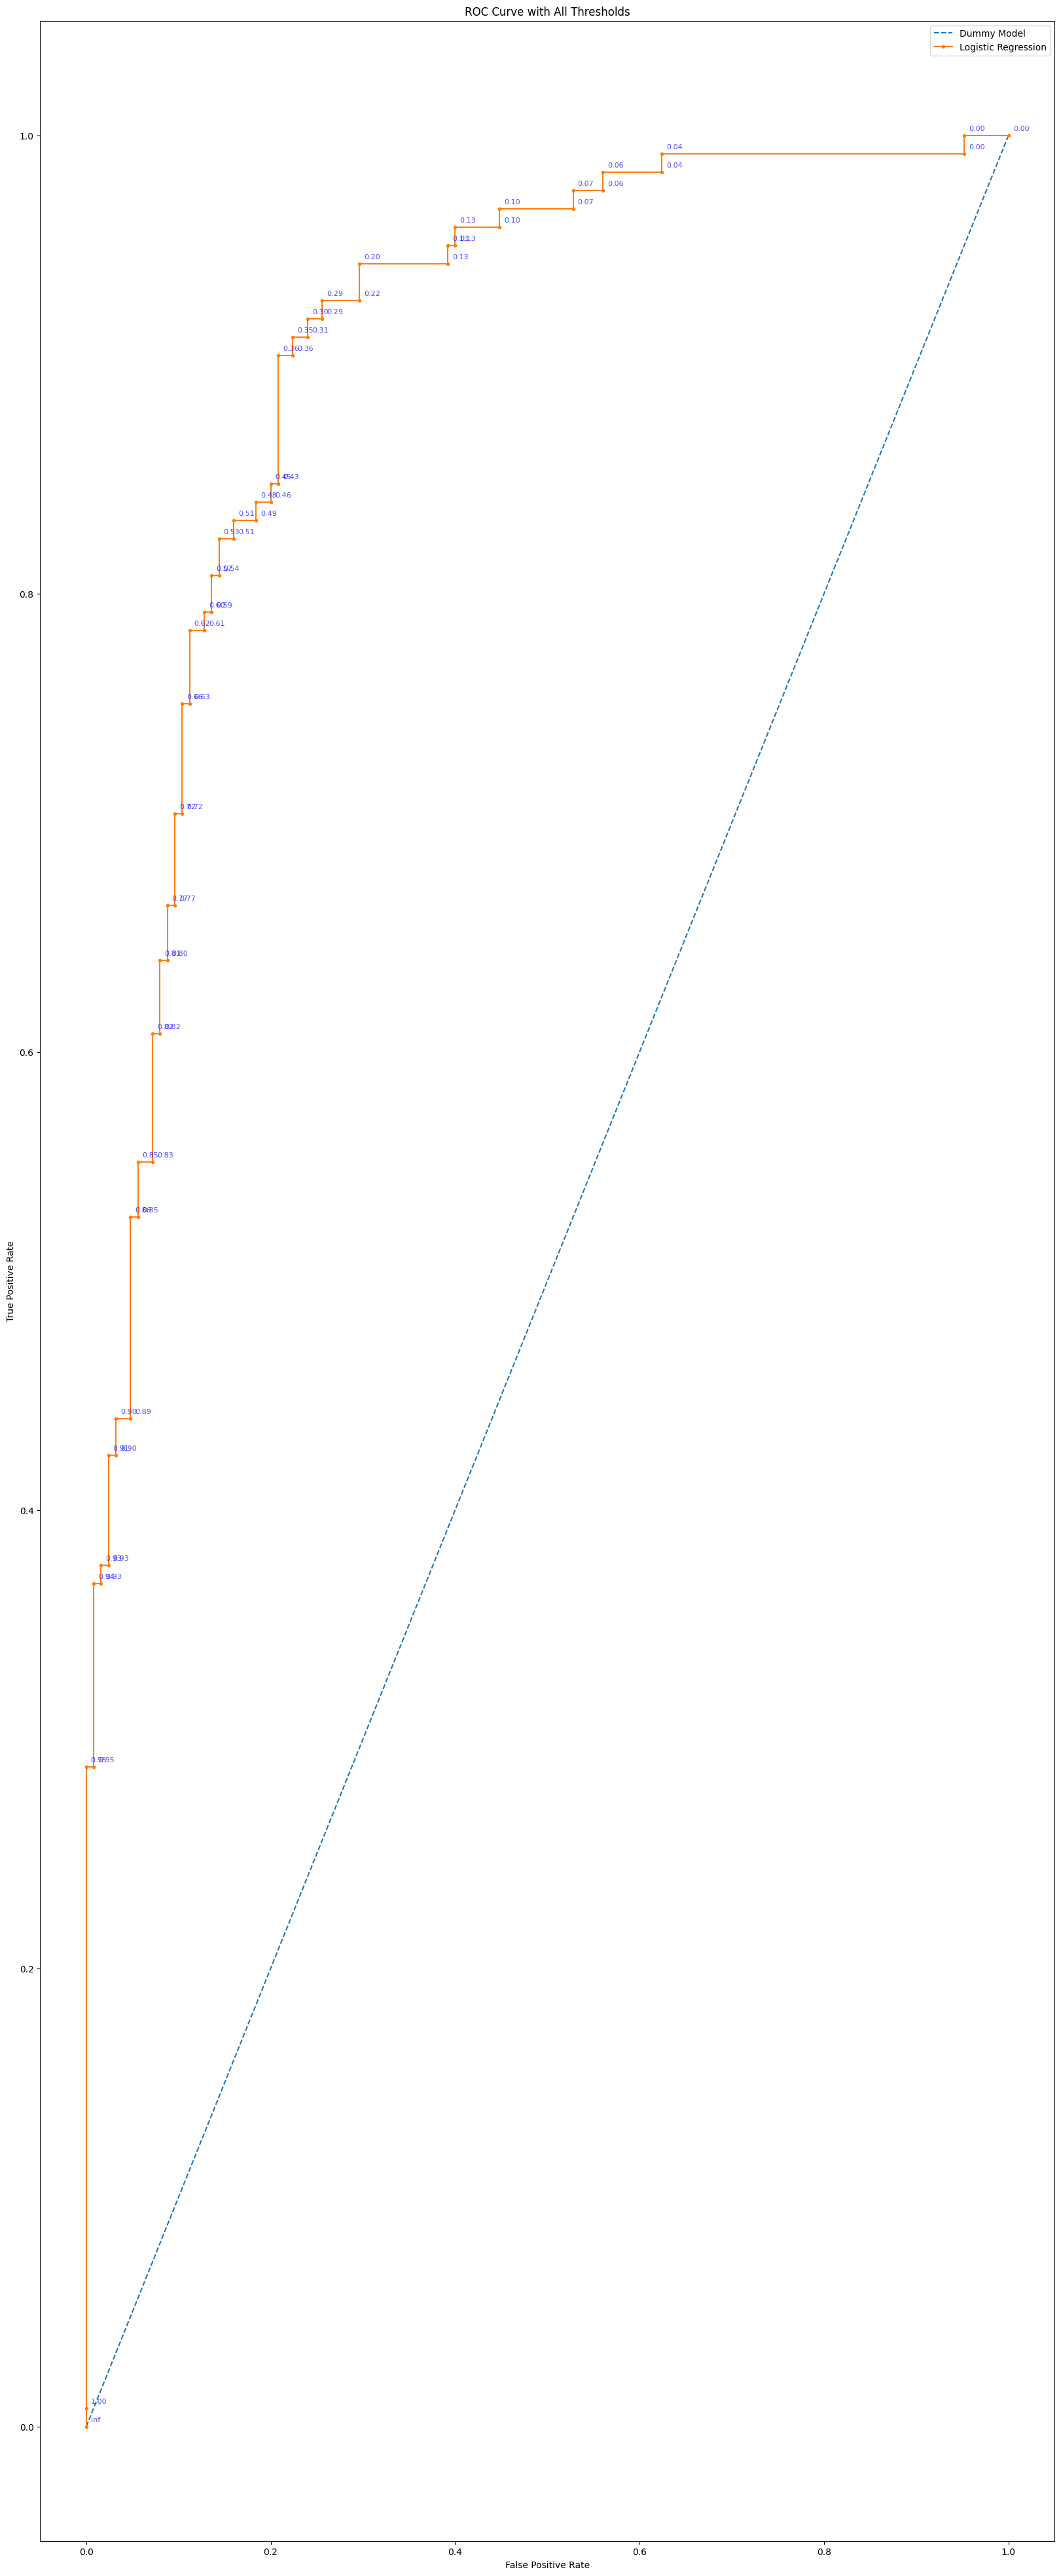

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20,50))

# Plot ROC curves
ax.plot(dummy_fpr, dummy_tpr, linestyle="--", label="Dummy Model")
ax.plot(model_fpr, model_tpr, marker=".", label="Logistic Regression")

# Annotate all thresholds (reduce font size for readability)
for fpr, tpr, thr in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f"{thr:.2f}", xy=(fpr, tpr), textcoords="offset points", 
                xytext=(5, 5), fontsize=8, color="b", alpha=0.7)

# Labels and title
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC Curve with All Thresholds")

# Show the legend
ax.legend()

# Show the plot
plt.show()
